## Table of Contents

1. [About LeetCode](#About-LeetCode)
2. [Disclaimer](#Disclaimer)
3. [Problem Description](#Problem-Description)
4. [Approach and Algorithm](#Approach-and-Algorithm)
5. [Code Implementation](#Code-Implementation)
6. [Big O Notation](#Big-O-Notation)

## 1. About LeetCode <a name="About-LeetCode"></a>


LeetCode is a popular online platform that provides a collection of coding interview questions and challenges. It is widely used by software engineers, developers, and students to practice and improve their algorithmic and coding skills.

LeetCode is a valuable resource for anyone looking to enhance their coding skills, prepare for coding interviews, or simply enjoy solving challenging problems. It can help you become more proficient in algorithms and data structures, improve problem-solving abilities, and gain confidence in coding interviews.

For more info about this platform, please check [the official website](https://leetcode.com/).




## 2. Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the problem stated in [LeetCode](https://leetcode.com/studyplan/leetcode-75/). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of LeetCode, and all rights are reserved by them.



## 3. Problem Description <a name="Problem-Description"></a>
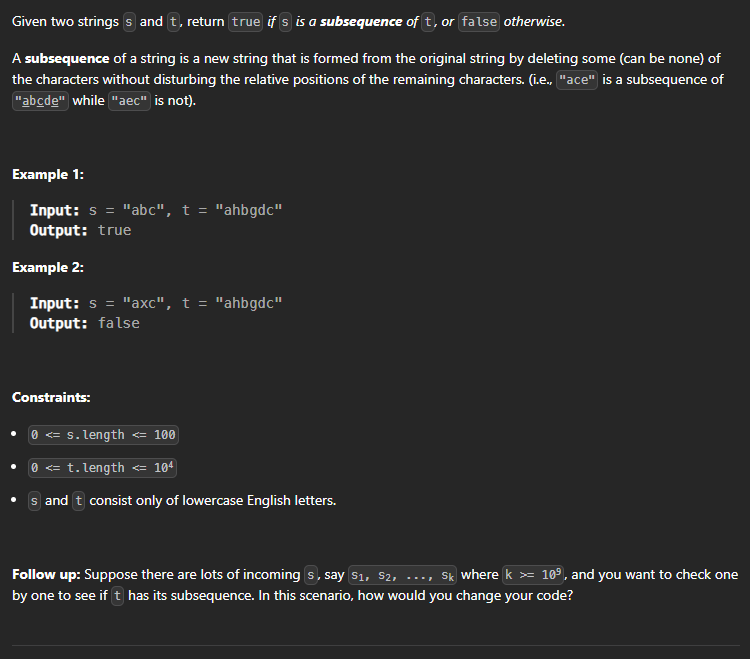

## 4. Approach and Algorithm <a name="Approach-and-Algorithm"></a>

Again, I use a two-pointer approach.

Here's the algorithm:

1. Initialize two pointers, i and j, both initially set to 0, pointing to the start of strings s and t, respectively.

2. Iterate through t using a loop:

  - If the characters at s[i] and t[j] are equal, increment both i and j pointers.

  - If the characters are not equal, only increment the j pointer.

3. After the loop, if the i pointer is equal to the length of s, it means we have successfully traversed all characters of s in order within t, so we return True. Otherwise, we return False.

## 5. Code Implementation <a name="Code-Implementation"></a>


In [21]:
class Solution(object):
    def isSubsequence(self, s, t):
        i = 0
        j = 0
        while i < len(s) and j < len(t):
            if s[i] == t[j]:
                i += 1
            j += 1
        return i == len(s)

In [22]:
#Example 1
s = "abc"
t = "ahbgdc"
result = Solution().isSubsequence(s, t)
print(result)

True


In [23]:
#Example 2
s = "axc"
t = "ahbgdc"
result = Solution().isSubsequence(s, t)
print(result)

False


## 6. Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

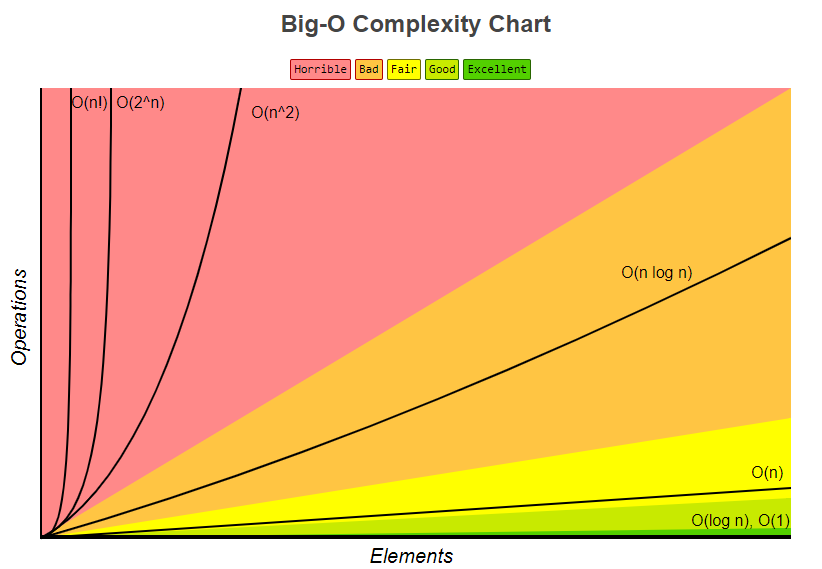

The time complexity of this solution is $O(n + m)$, where $n$ is the length of string $s$ and $m$ is the length of string $t$. We iterate through both strings once using the two pointers.

The space complexity is $O(1)$ since we only use a constant amount of extra space for the pointers.

This solution efficiently determines whether $s$ is a subsequence of $t$ by iterating through the strings in a linear manner.

## Follow up Code
In the scenario where there are many incoming strings `s1, s2, ..., sk` and we need to check if each of them is a subsequence of `t`, we can optimize the code by preprocessing `t` to create an index mapping of characters to their positions. This will allow us to efficiently check if each `si` is a subsequence of `t`.

Here's how we can modify the code for this scenario:

```python
def isSubsequence(s, t):
    index_map = {}
    for i, char in enumerate(t):
        if char not in index_map:
            index_map[char] = []
        index_map[char].append(i)

    def is_subseq(s, t_indices):
        j = 0
        for char in s:
            if char not in t_indices or j >= len(t_indices[char]):
                return False
            
            positions = t_indices[char]
            j = positions[j] + 1

        return True

    return is_subseq(s, index_map)

           
```

In this modified code, we first create an index mapping `index_map` that maps each character in `t` to a list of its positions. This preprocessing step has a time complexity of $O(m)$, where $m$ is the length of `t`.

Then, we define a helper function `is_subseq` that takes a string `s` and the index mapping `t_indices`. In this function, we iterate through the characters of `s` and check if each character exists in `t_indices`. If the character is not found or if we reach the end of the positions list for that character, we return `False`. Otherwise, we update `j` to the next position in the positions list.

Finally, we call the `is_subseq` function with the incoming string `s` and the index mapping `index_map` to check if `s` is a subsequence of `t`.

With this optimization, we preprocess `t` only once and can efficiently check if each incoming string is a subsequence of `t` without repeatedly iterating through `t` for each subsequence. This approach reduces the time complexity for each check to $O(n)$, where $n$ is the length of the incoming string, and the overall time complexity for checking all `k` subsequences is $O(k*n)$. The space complexity is $O(m)$ to store the index mapping.

## Example

Let's consider an example to illustrate the follow up code. Suppose we have the following inputs:




In [24]:
t = "ahbgdc"
subsequences = ["abc", "axc", "ahd", "bgdc"]

We want to check if each subsequence is present in `t`.

Using the modified code, here's how we can perform the checks:


In [38]:
def isSubsequence(s, t):
    index_map = {}
    for i, char in enumerate(t):
        if char not in index_map:
            index_map[char] = []
        index_map[char].append(i)

    def is_subseq(s, t_indices):
        j = -1
        for char in s:
            if char not in t_indices:
                return False

            positions = t_indices[char]
            left, right = 0, len(positions) - 1

            # Perform a binary search to find the minimum position greater than j
            while left <= right:
                mid = left + (right - left) // 2
                if positions[mid] <= j:
                    left = mid + 1
                else:
                    right = mid - 1

            if left == len(positions):
                return False

            j = positions[left]

        return True

    for subseq in subsequences:
        result = is_subseq(subseq, index_map)
        print(f"{subseq}: {result}")

In [40]:
t = "ahbgdc"
subsequences = ["abc", "axc", "ahd", "bgdc"]
isSubsequence(subsequences, t)

abc: True
axc: False
ahd: True
bgdc: True


In this example, the subsequences "abc" and "bgdc" and "ahd" are both present in `t`, so the corresponding checks return `True`. On the other hand, "axc" is not found as subsequences in `t`, resulting in `False` for those checks.

This approach allows us to efficiently check multiple incoming subsequences against `t` by preprocessing `t` once and using the index mapping.